In [1]:
import numpy as np
import math
import statistics as stat
import random

from matchings import cross_bin_matching, same_bin_matching, immediate_neighbor_matching, max_weight_matching
from scipy.stats import norm
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as patches


lblue = (40/255,103/255,178/255)
sgreen = (46/255,139/255,87/255)
cred = (0.69411765, 0.01568627, 0.05490196)


## The algorithm

In [2]:
def SCINT_test(X,Y,Z,M,nperm=500):
    Del_X = [X[i]-X[j] for (i,j) in M]
    Del_Y = [Y[i]-Y[j] for (i,j) in M]
    
    T=np.dot(Del_X,Del_Y)
            
    T_S = []
    for t in range(nperm):
        S = (np.random.rand(len(M))<0.5)*2-1        
        T_S.append(np.dot(np.multiply(S,Del_X),Del_Y))
    return np.mean([a>T for a in T_S])


## Simulation Settings

In [3]:
def mu(Y,Z,beta):
    return (Z + beta * Y)
def simulation(n,beta,setting):
    if setting == 1:
        Z = np.random.normal(0,1,n)
        Y = np.random.normal(0,1,n)
        
    elif setting == 2:
        Z = np.random.normal(0,1,n)
        Y = np.absolute(Z) + np.random.normal(0,1,n)
        
    elif setting == 3:
        Z = np.random.normal(0,1,n)
        Y = -np.absolute(Z) + np.random.normal(0,1,n)
        
    X = mu(Y,Z,beta) + np.random.normal(0,1,n)
    return X,Y,Z

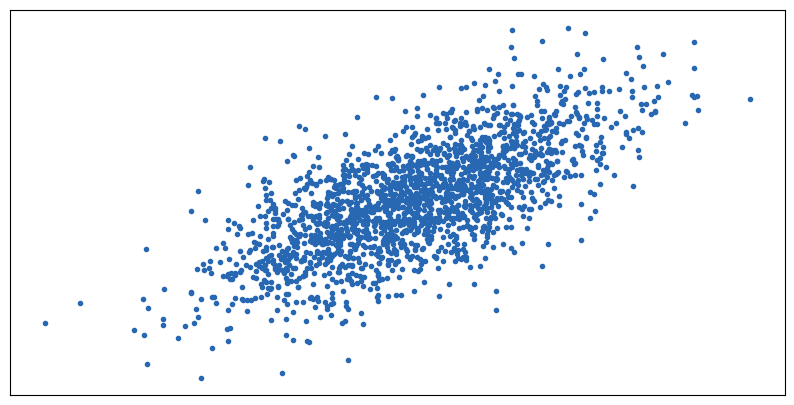

In [4]:
beta=1/np.sqrt(2000)
X,Y,Z = simulation(2000,beta,1)
plt.figure(figsize=(10,5))
plt.plot(Z, X, '.', c=lblue)
plt.xticks([])
plt.yticks([])

plt.show()

# setting 1

In [5]:
nrep=200
alpha=0.1

nseq=np.arange(500,30501,1000)
power_nbhd_0=[];power_sb_0=[];power_cb_0=[]
power_nbhd_1=[];power_sb_1=[];power_cb_1=[]
power_nbhd_2=[];power_sb_2=[];power_cb_2=[]

for n in tqdm(nseq):
    #at null
    beta=0
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,1)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_0.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_0.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_0.append(np.mean([p<alpha for p in pvalue_cb]))

    
    #at detection threshold
    beta=2/np.sqrt(n)
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,1)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_1.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_1.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_1.append(np.mean([p<alpha for p in pvalue_cb]))

    #above detection threshold
    beta=1/(n**0.3)
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,1)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_2.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_2.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_2.append(np.mean([p<alpha for p in pvalue_cb]))


100%|████████████████████████████████████████| 31/31 [2:26:50<00:00, 284.21s/it]


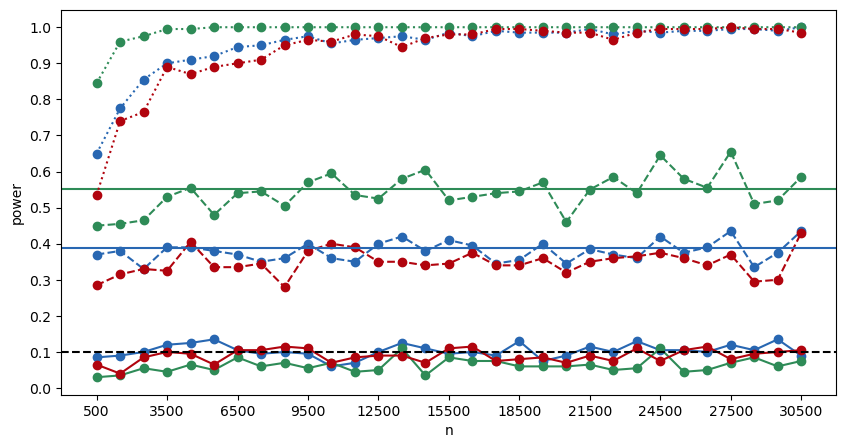

In [6]:
plt.figure(figsize=(10,5))
#at null
plt.plot(nseq, power_nbhd_0,marker='o', linestyle='solid',c=lblue)
plt.plot(nseq, power_cb_0,marker='o', linestyle='solid', c=sgreen)
plt.plot(nseq, power_sb_0,marker='o', linestyle='solid',c=cred)

#at detection threshold
plt.plot(nseq, power_nbhd_1,marker='o', linestyle='dashed',c=lblue)
plt.plot(nseq, power_cb_1,marker='o', linestyle='dashed', c=sgreen)
plt.plot(nseq, power_sb_1,marker='o', linestyle='dashed',c=cred)
plt.axhline(y=norm.cdf(1-norm.ppf(1-alpha)),c=lblue)
plt.axhline(y=norm.cdf(np.sqrt(2)-norm.ppf(1-alpha)),c=sgreen)


#above detection threshold
plt.plot(nseq, power_nbhd_2,marker='o', linestyle='dotted',c=lblue)
plt.plot(nseq, power_cb_2,marker='o', linestyle='dotted', c=sgreen)
plt.plot(nseq, power_sb_2,marker='o', linestyle='dotted',c=cred)

plt.axhline(y=alpha,c=(0,0,0),linestyle='--')
plt.xticks(np.arange(500,30501,3000))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('n');plt.ylabel('power')
plt.show()

## setting 2

In [206]:
nrep=200
alpha=0.1

nseq=np.arange(500,30501,1000)
power_nbhd_0=[];power_sb_0=[];power_cb_0=[]
power_nbhd_1=[];power_sb_1=[];power_cb_1=[]
power_nbhd_2=[];power_sb_2=[];power_cb_2=[]

for n in tqdm(nseq):
    #at null
    beta=0
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,2)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_0.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_0.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_0.append(np.mean([p<alpha for p in pvalue_cb]))

    
    #at detection threshold
    beta=2/np.sqrt(n)
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,2)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_1.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_1.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_1.append(np.mean([p<alpha for p in pvalue_cb]))

    #above detection threshold
    beta=1/(n**0.3)
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,2)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_2.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_2.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_2.append(np.mean([p<alpha for p in pvalue_cb]))

100%|████████████████████████████████████████| 31/31 [2:03:47<00:00, 239.60s/it]


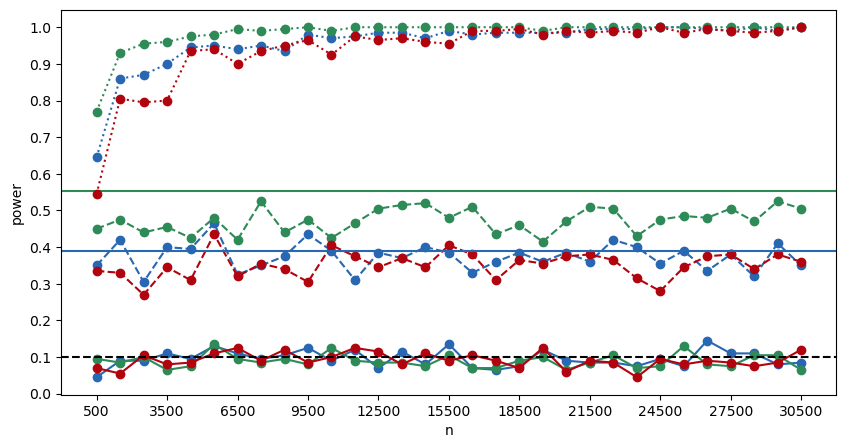

In [207]:
plt.figure(figsize=(10,5))
#at null
plt.plot(nseq, power_nbhd_0,marker='o', linestyle='solid',c=lblue)
plt.plot(nseq, power_cb_0,marker='o', linestyle='solid', c=sgreen)
plt.plot(nseq, power_sb_0,marker='o', linestyle='solid',c=cred)

#at detection threshold
plt.plot(nseq, power_nbhd_1,marker='o', linestyle='dashed',c=lblue)
plt.plot(nseq, power_cb_1,marker='o', linestyle='dashed', c=sgreen)
plt.plot(nseq, power_sb_1,marker='o', linestyle='dashed',c=cred)
plt.axhline(y=norm.cdf(1-norm.ppf(1-alpha)),c=lblue)
plt.axhline(y=norm.cdf(np.sqrt(2)-norm.ppf(1-alpha)),c=sgreen)


#above detection threshold
plt.plot(nseq, power_nbhd_2,marker='o', linestyle='dotted',c=lblue)
plt.plot(nseq, power_cb_2,marker='o', linestyle='dotted', c=sgreen)
plt.plot(nseq, power_sb_2,marker='o', linestyle='dotted',c=cred)

plt.axhline(y=alpha,c=(0,0,0),linestyle='--')
plt.xticks(np.arange(500,30501,3000))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('n');plt.ylabel('power')
plt.show()

## setting 3

In [208]:
nrep=200
alpha=0.1

nseq=np.arange(500,30501,1000)
power_nbhd_0=[];power_sb_0=[];power_cb_0=[]
power_nbhd_1=[];power_sb_1=[];power_cb_1=[]
power_nbhd_2=[];power_sb_2=[];power_cb_2=[]

for n in tqdm(nseq):
    #at null
    beta=0
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,3)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_0.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_0.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_0.append(np.mean([p<alpha for p in pvalue_cb]))

    
    #at detection threshold
    beta=2/np.sqrt(n)
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,3)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_1.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_1.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_1.append(np.mean([p<alpha for p in pvalue_cb]))

    #above detection threshold
    beta=1/(n**0.3)
    pvalue_nbhd=[];pvalue_sb=[];pvalue_cb=[]
    for l in range(nrep):
        X,Y,Z = simulation(n,beta,3)
        eta = 1/(n**0.75)
        M_nbhd = immediate_neighbor_matching(Y, Z)
        M_sb = same_bin_matching(Y, Z, eta)
        M_cb = cross_bin_matching(Y, Z, eta)
        pvalue_nbhd.append(SCINT_test(X,Y,Z,M_nbhd))
        pvalue_sb.append(SCINT_test(X,Y,Z,M_sb))
        pvalue_cb.append(SCINT_test(X,Y,Z,M_cb))
    power_nbhd_2.append(np.mean([p<alpha for p in pvalue_nbhd]))
    power_sb_2.append(np.mean([p<alpha for p in pvalue_sb]))
    power_cb_2.append(np.mean([p<alpha for p in pvalue_cb]))

100%|████████████████████████████████████████| 31/31 [1:58:52<00:00, 230.07s/it]


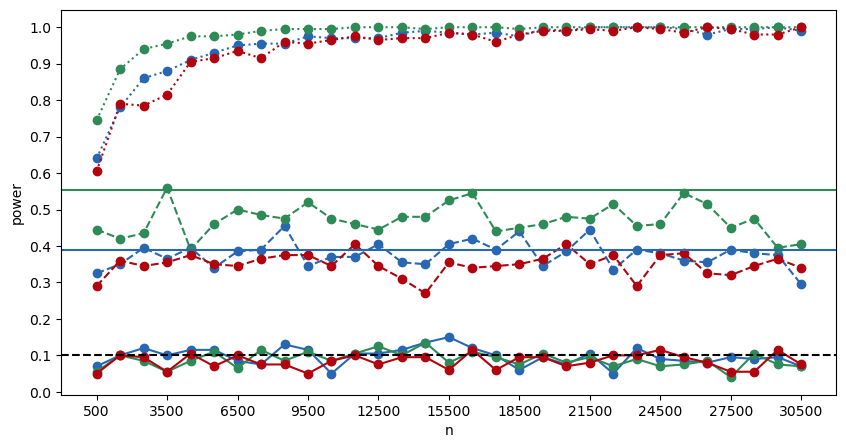

In [209]:
plt.figure(figsize=(10,5))
#at null
plt.plot(nseq, power_nbhd_0,marker='o', linestyle='solid',c=lblue)
plt.plot(nseq, power_cb_0,marker='o', linestyle='solid', c=sgreen)
plt.plot(nseq, power_sb_0,marker='o', linestyle='solid',c=cred)

#at detection threshold
plt.plot(nseq, power_nbhd_1,marker='o', linestyle='dashed',c=lblue)
plt.plot(nseq, power_cb_1,marker='o', linestyle='dashed', c=sgreen)
plt.plot(nseq, power_sb_1,marker='o', linestyle='dashed',c=cred)
plt.axhline(y=norm.cdf(1-norm.ppf(1-alpha)),c=lblue)
plt.axhline(y=norm.cdf(np.sqrt(2)-norm.ppf(1-alpha)),c=sgreen)


#above detection threshold
plt.plot(nseq, power_nbhd_2,marker='o', linestyle='dotted',c=lblue)
plt.plot(nseq, power_cb_2,marker='o', linestyle='dotted', c=sgreen)
plt.plot(nseq, power_sb_2,marker='o', linestyle='dotted',c=cred)

plt.axhline(y=alpha,c=(0,0,0),linestyle='--')
plt.xticks(np.arange(500,30501,3000))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('n');plt.ylabel('power')
plt.show()

In [2]:
cross_bin_matching

<function matchings.cross_bin_matching(Y, Z, eta)>